In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from convert_latlong_to_xyz import *

In [148]:
data = pd.read_csv("data/boucle1_dumont/resultats_kalman.csv")
data_gpx = pd.read_csv("data/boucle1_dumont/gpx_synchro.csv")

In [149]:
pos_pred_x = data["positions_pred_x"]
pos_pred_y = data["positions_pred_y"]
pos_pred_z = data["positions_pred_z"]
vit_pred_x = data["vit_pred_x"]
vit_pred_y = data["vit_pred_y"]
vit_pred_z = data["vit_pred_z"]

pos_reel_x = data["pos_reel_x"]
pos_reel_y = data["pos_reel_y"]
pos_reel_z = data["pos_reel_z"]

pos_gpx_lat = data_gpx["Latitude"]
pos_gpx_lon = data_gpx["Longitude"]
speed_gpx = data_gpx["Speed"]

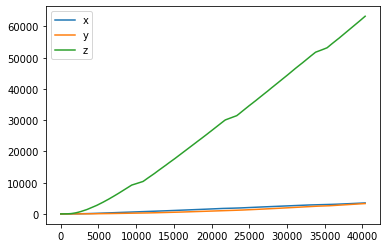

In [150]:
plt.plot(np.abs(pos_pred_x - pos_reel_x), label="x")
plt.plot(np.abs(pos_pred_y - pos_reel_y), label="y")
plt.plot(np.abs(pos_pred_z - pos_reel_z), label="z")
plt.legend()

In [151]:
pos_pred_latlon = []
for i in range(len(pos_reel_x)):
    pos_pred_latlon.append(convert_xyz_to_latlon(pos_pred_x[i], pos_pred_y[i], pos_pred_z[i]))
pos_pred_latlon = np.array(pos_pred_latlon)

In [152]:
if len(pos_gpx_lat) != len(pos_pred_x):
    indice_start_pred = len(pos_pred_x) - len(pos_gpx_lat)
print(indice_start_pred)

218


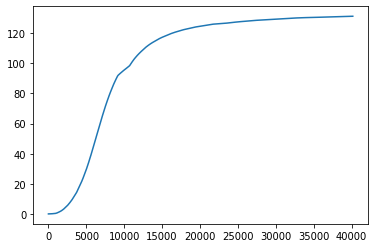

In [153]:
plt.plot(np.abs(pos_gpx_lat - pos_pred_latlon[:,0][indice_start_pred:]))

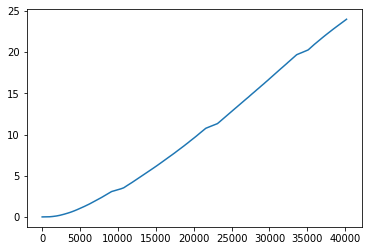

In [154]:
plt.plot(np.abs(pos_gpx_lon - pos_pred_latlon[:,1][indice_start_pred:]))

In [155]:
pos_gpx_xyz = []
for i in range(len(pos_gpx_lat)):
    pos_gpx_xyz.append(convert(pos_gpx_lat.iloc[i], pos_gpx_lon.iloc[i]))
pos_gpx_xyz = np.array(pos_gpx_xyz)

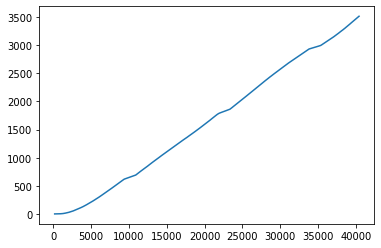

In [156]:
plt.plot(np.abs(pos_gpx_xyz[:,0] - pos_pred_x[indice_start_pred:]))

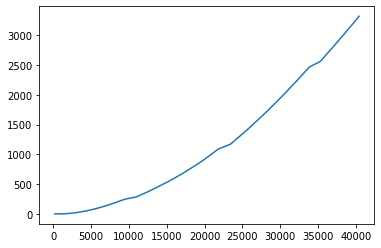

In [157]:
plt.plot(np.abs(pos_gpx_xyz[:,1] - pos_pred_y[indice_start_pred:]))

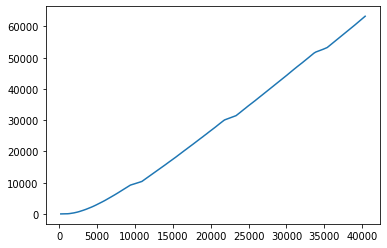

In [158]:
plt.plot(np.abs(pos_gpx_xyz[:,2] - pos_pred_z[indice_start_pred:]))

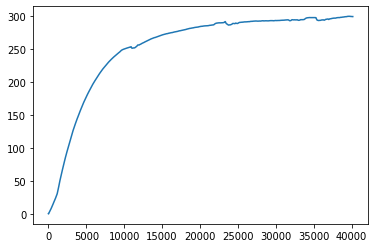

In [159]:
plt.plot(np.abs(speed_gpx - np.sqrt(vit_pred_x**2+vit_pred_y**2+vit_pred_z**2)))

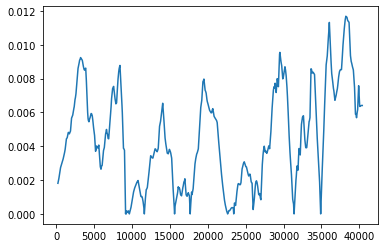

In [147]:
plt.plot(np.abs(pos_reel_x[indice_start_pred:] - pos_gpx_xyz[:,0]), label="x")